# background
This notebook imports some simple background data, taken from the background simulation report. Largely incomplete to facilitate a more complete treatment of background.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import astropy.units as unit
import astropy.constants as const
import itertools
import plotly.express as px 
import pandas as pd
from scipy.stats import linregress

from axion_functions import *

In [16]:
bg = np.loadtxt("Data\\cosmo_bg.txt")

days = bg[0,:]
bg_rates = bg[1,:]
bg_base = 5.2e-1

bg_total = bg_base + bg_rates

cpd_to_count = 365.25*3*50
cpd_to_ckg = 50*5
N_bg = bg_total*cpd_to_count*5

def integrated_counts():
    """Integrates background to end up in counts per kev"""
    output = []
    for index in range(1,len(days)):
        val = np.trapz(bg_total[:index], days[:index])*50
        output.append(val)
    return np.array(output)


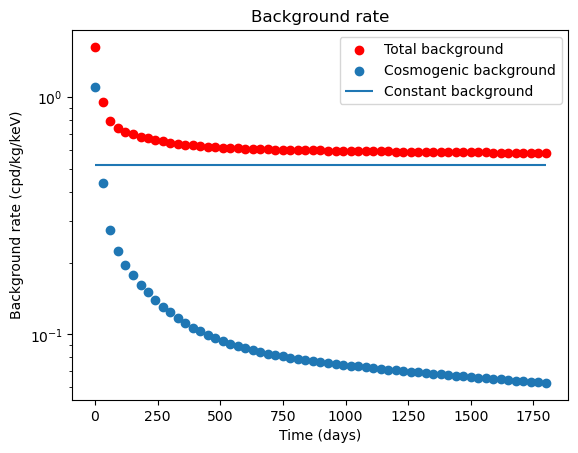

In [13]:
fig,ax = plt.subplots()
ax.scatter(days, bg_total, color="red")
ax.scatter(days, bg_rates)
ax.hlines(bg_base, days[0], days[-1])
ax.set_xlabel("Time (days)")
ax.set_ylabel("Background rate (cpd/kg/keV)")
plt.legend(["Total background", "Cosmogenic background", "Constant background"])
plt.title("Background rate")
plt.yscale("log")

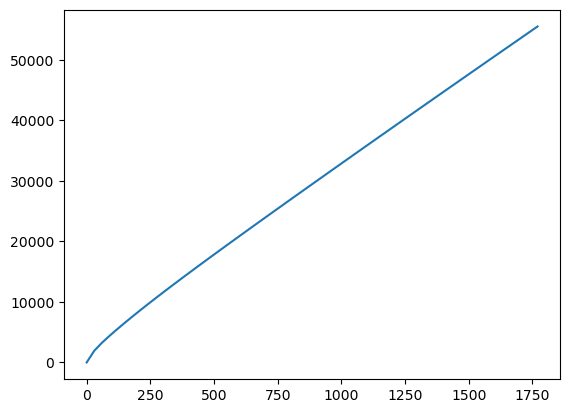

In [17]:
plt.plot(days[:-1], integrated_counts())